In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon December 12 18:30:37 2019

@author: sila
"""

'\nCreated on Mon December 12 18:30:37 2019\n\n@author: sila\n'

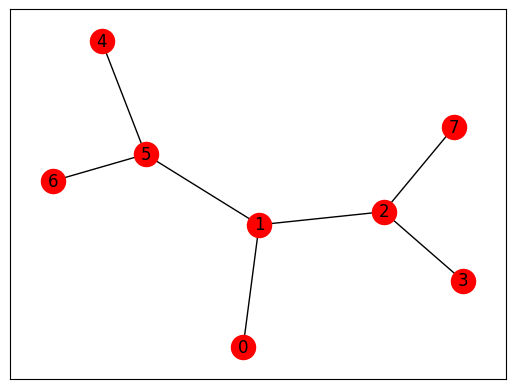

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [3]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

#Our starting point is 0, our goal point is 7.

goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='r')
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

# Create rewards graph

# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# We then change the values to be 0 if it is a viable path and 100 if it is a goal path

# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

In [4]:
print("the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions.")
print(R)

Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

print(available_act)

the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions.
[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100.]]
[0 2 5]


In [5]:
available_actions_break = int(input("Available actions from initial state (do press 0 to continue):"))

def sample_next_action(available_actions_range):
    next_action = np.squeeze(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

In [6]:
print(action)

0


In [7]:
# This function updates the Q matrix according to the path selected and the Q
# learning algorithm
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  #print(current_state)
  #print(action)

  if max_index.shape[0] > 1:
      max_index = np.squeeze(np.random.choice(max_index, size = 1))
  else:
      max_index = np.squeeze(max_index)

  #print(max_index) - from the new state, hvor gives highest Q?
  max_value = Q[action, max_index]

  # Q learning formula
  # Q[state, action] = Q[state, action] + lr * (reward + gamma * np.max(Q[new_state, :]) — Q[state, action])
  # for lr=1
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  #print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [8]:
update(initial_state, action, gamma)

after_update_break = int(input("Break after first call of update (do press 0 to continue):"))

In [9]:
# run the training and testing functions that will run the update function 700 times
# allowing the Q - learning model to figure out the most efficient path

#-------------------------------------------------------------------------------
# Training


In [10]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

Score: 0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 100.0
Score: 173.77049180327867
Score: 173.77049180327867
Score: 173.77049180327867
Score: 173.77049180327867
Score: 173.77049180327867
Score: 253.77049180327867
Score: 333.7704918032787
Score: 413.7704918032787
Score: 423.86008744534666
Score: 484.82198625858837
Score: 545.7838850718301
Score: 478.4762304544024
Score: 494.4611186903138
Score: 558.4611186903138
Score: 558.4611186903138
Score: 609.6732081015847
Score: 609.6732081015847
Score: 609.6732081015847
Score: 650.6428796306013
Score: 691.6125511596181
Score: 691.6125511596181
Score: 732.5822226886348
Score: 773.5518942176514
Score

In [11]:
print("Trained Q matrix:")
print("the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions.")
print(Q)

after_training_break = int(input("Break after training (do press 0 to continue):"))

Trained Q matrix:
the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions.
[[  0.         319.99564975   0.           0.           0.
    0.           0.           0.        ]
 [255.9965198    0.         399.99456219   0.           0.
  255.99150342   0.           0.        ]
 [  0.         319.99564975   0.         319.99857451   0.
    0.           0.         499.99777267]
 [  0.           0.         399.99821814   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  255.9965198    0.           0.        ]
 [  0.         319.99564975   0.           0.         204.79721584
    0.         204.79320273   0.        ]
 [  0.           0.           0.           0.           0.
  255.9965198    0.           0.        ]
 [  0.           0.         399.99821814   0.           0.
    0.           0.         499.99821814]]


In [12]:
#-------------------------------------------------------------------------------
# Training

In [13]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index


C:\Users\lynge\AppData\Local\Temp\ipykernel_2596\2292587862.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


In [14]:
print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]
